<a href="https://colab.research.google.com/github/akhilesh2510/House_price_prediction/blob/main/Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

print(house_price_dataset)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# Adding Price Column in this

house_price_dataframe=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Checking for any missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [ ]:
house_price_dataframe.describe()
house_price_dataframe.shape

(20640, 9)

In [ ]:
# Understanding the correlation between various data

correlation=house_price_dataframe.corr()

<Axes: >

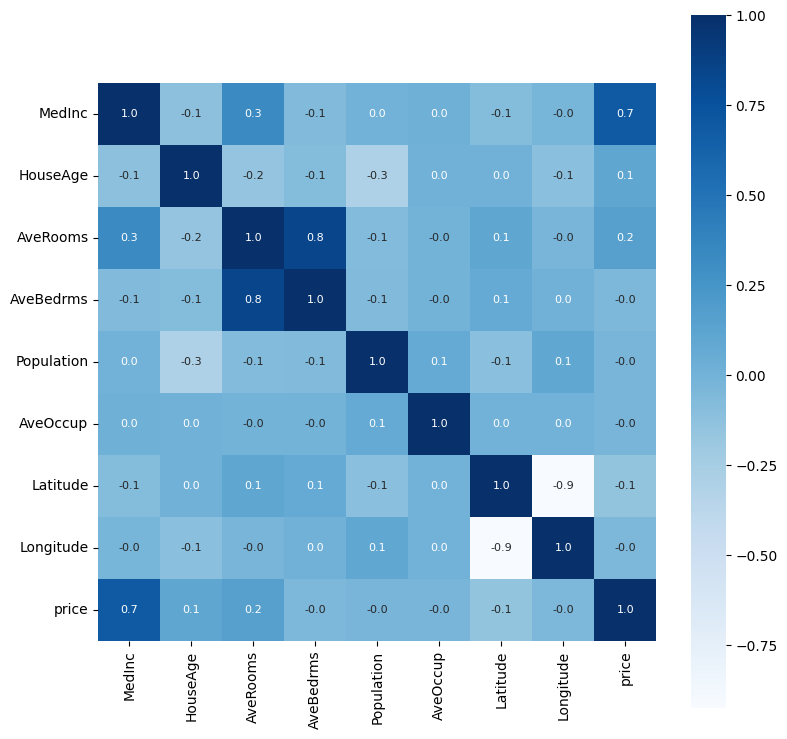

In [ ]:
# Constructing a Heat Map to understand the correlation better

plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

**Splitting the data and the Target**

In [ ]:
X=house_price_dataframe.drop(columns='price',axis=1)
Y=house_price_dataframe['price']

print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
# Splitting the data into Training and Test Data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


**Model Training Using XGBoost Regressor**

In [ ]:
# Loading the model

model=XGBRegressor()

In [ ]:
# Training the Model with X_train

model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluating The Model**

In [ ]:
# Accuracy for prediction on training data

training_data_prediction=model.predict(X_train)

print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [ ]:
# R-Squared Error

score_1=metrics.r2_score(Y_train,training_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)


print("The R Squared Error of this function is :",score_1)

print("The Mean Squared Error of this function is :",score_2)

The R Squared Error of this function is : 0.943650140819218
The Mean Squared Error of this function is : 0.1933648700612105


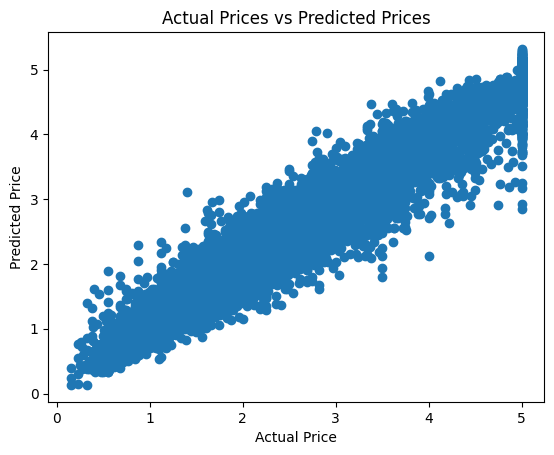

In [ ]:
# Visualizing the Actual and the predicted prices

plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

plt.show()


**Checking For Test Data**

In [ ]:
test_data_prediction=model.predict(X_test)

# R-Squared Error

score_1=metrics.r2_score(Y_test,test_data_prediction)

# Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)


print("The R Squared Error of this function is :",score_1)

print("The Mean Squared Error of this function is :",score_2)

The R Squared Error of this function is : 0.8338000331788725
The Mean Squared Error of this function is : 0.3108631800268186


**Plotting the Test Data vs Predicted Data**

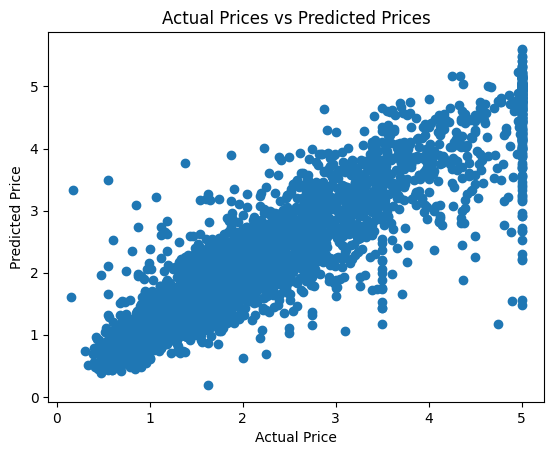

In [ ]:
# Visualizing the Actual and the predicted prices

plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")

plt.show()